In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
sb.set_style("darkgrid") 

%matplotlib inline 

In [2]:
#load dataset 
samp_superstore = pd.read_csv("sample_superstore.csv") 


## Data Wrangling

### Assessment

In [3]:
#view random rows of the dataset 
samp_superstore.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
8231,Second Class,Consumer,United States,Sandy Springs,Georgia,30328,South,Furniture,Bookcases,1266.860,7,0.0,291.3778
9705,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Binders,39.624,3,0.2,13.8684
3479,Standard Class,Corporate,United States,San Francisco,California,94110,West,Office Supplies,Paper,45.360,7,0.0,21.7728
1715,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Binders,7.712,2,0.2,2.7956
7486,Second Class,Home Office,United States,Dover,New Hampshire,3820,East,Office Supplies,Paper,29.900,5,0.0,14.6510
5722,First Class,Corporate,United States,Springfield,Oregon,97477,West,Technology,Accessories,159.968,4,0.2,29.9940
4380,Standard Class,Consumer,United States,San Francisco,California,94110,West,Office Supplies,Art,60.450,3,0.0,16.3215
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
9002,Standard Class,Corporate,United States,Sandy Springs,Georgia,30328,South,Office Supplies,Paper,15.240,3,0.0,7.1628
9610,Second Class,Consumer,United States,Los Angeles,California,90045,West,Office Supplies,Labels,27.720,9,0.0,13.3056


In [4]:
#obtain descriptive summary of the dataset 
samp_superstore.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#check for number of duplicate rows 
samp_superstore.duplicated().sum()

17

In [6]:
#check for number of null rows in each column
samp_superstore.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#obtain unique values of ship mode 
samp_superstore["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
#obtain unique Segment values 
samp_superstore["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
#obtain the unique values in Country
samp_superstore.Country.unique()


array(['United States'], dtype=object)

In [10]:
# obtain the unique Regions
samp_superstore.Region.unique()


array(['South', 'West', 'Central', 'East'], dtype=object)

In [11]:
#obtain the number of unique values in Category
samp_superstore.Category.value_counts()


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
#obtain the number of unique values in  Sub-Category column 
samp_superstore["Sub-Category"].nunique()


17

In [13]:
#obtain the count of the unique values in Sub-Category
samp_superstore["Sub-Category"].value_counts()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [14]:
#check for number of unique States 
samp_superstore.State.nunique()


49

In [15]:
#check number of Cities 
samp_superstore.City.nunique()


531

In [16]:
#obtain the unique Quantity values 
samp_superstore.Quantity.unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12])

### Issues 

- Spaces in column names 
- Repititive value in `Country` column
- Dtype of Postal Code as int
- Zip codes with less than 5 numeric digits 
- "-" in `Sub-Category` column
- Duplicated rows 
- Dtype of `Quantity` column
- Unordered `Quantity` values  
- Negative `Profit` values 
- Null rows 

### Cleaning

One of the issues noted in the assessment phase is the presence of a space between the words of some column names.

Below, the space in those column names will be replaced with an underscore ("\_") as this allows more flexibility in the use of the column names.

In [17]:
#create a list containing column names 
col_names = list(samp_superstore.columns) 


In [18]:
def replace_space(df, list_col_names): 
    """
    This function replaces the space in the column names 
    with spaces between their words with '_'
    """
    for col_name in list_col_names: 
        if " " in col_name: 
            new_name = col_name.replace(" ", "_") 
            df.rename(columns = {col_name : new_name}, 
                      inplace = True) 
    return df 


In [19]:
#apply the function 
samp_superstore = replace_space(samp_superstore, col_names) 

#confirm change 
samp_superstore.head(1)

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


Since all the transactions made were to customers living in the United States, the `Country` column will be dropped as it is unnecessary, and only contains repetitive values.

In [20]:
#drop Country column 
samp_superstore.drop("Country", axis = 1, inplace = True) 

#confirm 
samp_superstore.columns

Index(['Ship_Mode', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

The postal code for customers in the dataset has datatype as integer. This will be converted to string datatype as calculations will not be performed on the postal codes.

In [21]:
#change datatype of Postal_Code from int to string 
samp_superstore.Postal_Code = samp_superstore.Postal_Code.astype(str)

#confirm 
samp_superstore.dtypes


Ship_Mode        object
Segment          object
City             object
State            object
Postal_Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

According to this [article](https://www.usatoday.com/story/news/2022/10/03/what-is-a-postal-code-zip/7836090001/), in the United States, postal codes are usually 5-digit characters. During the data assessment though, some postal codes were noticed to have only 4 digits. This may have been a typographical error. Below, 0 will be added to the front of each incomplete postal code.

In [22]:
def incomplete_code_checker(col_name):
    """This function returns the number 
    of codes in a code column with less 
    than 5 digits"""
    count = 0
    for x in col_name:
        if len(x) < 5: 
            count += 1 
        else: 
            count += 0 
    return count 


In [23]:
#apply to Postal_Code 
incomplete_code_checker(samp_superstore.Postal_Code)


449

In [24]:
#add zero to at the beginning of incomplete postal codes 
samp_superstore.Postal_Code = samp_superstore.Postal_Code.str.pad(5, fillchar = "0")

# confirm 
incomplete_code_checker(samp_superstore.Postal_Code) 


0

Below, the column `Sub-Category` will be renamed `Sub_Category`. This again is to increase the flexibility of use.

In [25]:
#rename Sub-Category column 
samp_superstore.rename(columns = {"Sub-Category" : "Sub_Category"}, inplace = True)

#confirm 
samp_superstore.head(1)


,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


A total of 17 rows were found to be duplicated in the assessment phase and will be dropped next.

In [26]:
#drop duplicate rows 
samp_superstore.drop_duplicates(inplace = True)

#confirm 
samp_superstore.duplicated().sum()


0

The `Quantity` variable should be ordinal, hence, next the values in the column will be ordered. First though, the datatype of the `Quantity` column will be changed to string. 

In [27]:
#change Quantity datatype to string 
samp_superstore.Quantity = samp_superstore.Quantity.astype(str) 

#confirm 
samp_superstore.dtypes


Ship_Mode        object
Segment          object
City             object
State            object
Postal_Code      object
Region           object
Category         object
Sub_Category     object
Sales           float64
Quantity         object
Discount        float64
Profit          float64
dtype: object

Next, the `Quantity` column will be converted from plain string to an ordered categorical datatype.

In [28]:
#create Quantity order 
quantity_order = ["1", "2", "3", "4", "5", "6", 
                  "7", "8", "9", "10", "11", "12"]


In [29]:
#create the Quantity categorical datatype 
quantity_cat_dtype = pd.api.types.CategoricalDtype(ordered = True, categories = quantity_order) 

#apply created datatype on Quantity column
samp_superstore.Quantity = samp_superstore.Quantity.astype(quantity_cat_dtype)

#confirm 
samp_superstore.dtypes


Ship_Mode         object
Segment           object
City              object
State             object
Postal_Code       object
Region            object
Category          object
Sub_Category      object
Sales            float64
Quantity        category
Discount         float64
Profit           float64
dtype: object

During visual assessment of the dataset, some negative values were noticed in the `Profit` column. This may have been an error, and would be corrected below.<br>

First, the datatype of the column will be changed to string, and the negative sign ("-") will be sliced off the negative values. Afterwards, the values will be changed back to float.

In [30]:
#change data type of Profit column to string
samp_superstore.Profit = samp_superstore.Profit.astype(str)

#confirm change
samp_superstore.dtypes


Ship_Mode         object
Segment           object
City              object
State             object
Postal_Code       object
Region            object
Category          object
Sub_Category      object
Sales            float64
Quantity        category
Discount         float64
Profit            object
dtype: object

In [31]:
def neg_checker(colname): 
    """ This function returns the 
    number of negative string values 
    present in a column 
    """
    count = 0
    for x in colname:
        if "-" in x:
            count += 1
    return count
                      

In [32]:
#apply function on Profit column 
neg_checker(samp_superstore["Profit"])


1869

Convert negative values in `Profit` column to positive values.

In [33]:
def convert_to_positive(x): 
    """ This function converts negative 
    string values to positive string
    values """
    if "-" in x:
        return x[1:]
    else: 
        return x 
    

In [34]:
#apply to Profit column 
samp_superstore.Profit = samp_superstore.Profit.apply(convert_to_positive)

#confirm 
neg_checker(samp_superstore["Profit"])


0

Convert `Profit` column back to float. 

In [35]:
samp_superstore.Profit = samp_superstore.Profit.astype(float) 

#confirm change 
samp_superstore.dtypes 


Ship_Mode         object
Segment           object
City              object
State             object
Postal_Code       object
Region            object
Category          object
Sub_Category      object
Sales            float64
Quantity        category
Discount         float64
Profit           float64
dtype: object

Below, null rows noticed during assessment will be dropped.

In [36]:
#remove null rows
samp_superstore.dropna(inplace = True) 

#confirm 
samp_superstore.isnull().sum()


Ship_Mode       0
Segment         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Exploratory Data Analysis (EDA)


### Univariate Exploration 

The individual features will be explored to gain a better understanding of the data.

In [37]:
samp_superstore.sample(10)

,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
7243,Second Class,Consumer,Philadelphia,Pennsylvania,19134,East,Furniture,Chairs,4416.174,9,0.3,630.8820
7116,Second Class,Consumer,Seattle,Washington,98103,West,Office Supplies,Paper,61.960,2,0.0,27.8820
2293,Standard Class,Corporate,New York City,New York,10009,East,Technology,Phones,4.950,1,0.0,1.3365
5456,Standard Class,Consumer,Edmonds,Washington,98026,West,Office Supplies,Fasteners,19.600,5,0.0,9.6040
149,Standard Class,Corporate,Franklin,Wisconsin,53132,Central,Furniture,Chairs,1951.840,8,0.0,585.5520
1523,Standard Class,Consumer,Tucson,Arizona,85705,West,Office Supplies,Paper,198.272,8,0.2,61.9600
1789,Standard Class,Corporate,Kenosha,Wisconsin,53142,Central,Technology,Accessories,139.950,5,0.0,26.5905
1177,Standard Class,Consumer,Rockville,Maryland,20852,East,Furniture,Chairs,172.500,2,0.0,51.7500
1646,First Class,Home Office,Philadelphia,Pennsylvania,19140,East,Technology,Accessories,35.360,2,0.2,3.0940
5404,Standard Class,Consumer,Los Angeles,California,90045,West,Technology,Phones,445.960,5,0.2,55.7450


#### What is the percentage distribution of the various modes of shipping?

In [38]:
#choose color palette 
choice_color = sb.color_palette()[9]


In [39]:
#obtain count for each unique value in Ship _Mode
mode_count = samp_superstore.Ship_Mode.value_counts() 

#obtain total count of Ship_Mode in dataset 
mode_sum = mode_count.sum()

#create bar order
mode_order = mode_count.index


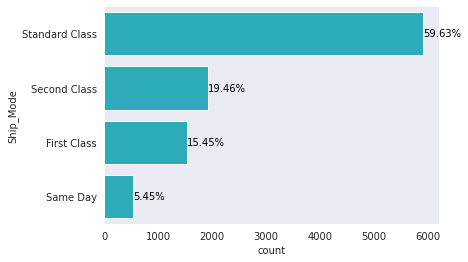

In [40]:
#visualize percentage distribution of Ship_Mode 
sb.countplot(data = samp_superstore, y = "Ship_Mode", color = choice_color, 
            order = mode_order);

#include percentage text on bars 
for i in range(mode_count.shape[0]): 
    count = mode_count[i]
    prop_str = '{:0.2f}%'.format(100 * count / mode_sum) 
    plt.text(count + 1, i, prop_str, va = "center", color = "black") 

plt.grid(False)    


#### In what segment was the most sales made?

In [41]:
#choose color 
color6 = sb.color_palette()[7]

In [42]:
#obtain count of each unique value in Segment
seg_count = samp_superstore.Segment.value_counts() 

#obtain total count of Ship_Mode in dataset 
seg_sum = seg_count.sum()

#create bar order
seg_order = seg_count.index


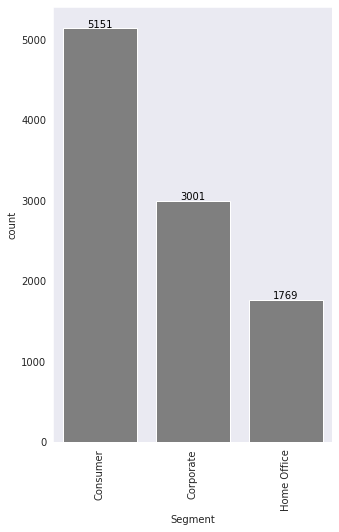

In [43]:
#set figure size
plt.figure(figsize = (5,8))

#visualize distribution of Ship_Mode 
sb.countplot(data = samp_superstore, x = "Segment", color = color6, 
            order = seg_order);

#include text on bars 
locs, labels = plt.xticks(rotation = 90)
for loc, label in zip(locs, labels): 
    count = seg_count[label.get_text()]
    count_str = '{}'.format(count)
    plt.text(loc, count + 5, count_str, ha = "center", color = "black");
             

plt.grid(False)  
            

#### What state has the highest sales frequency?

In [44]:
#choose color palette 
base_color = sb.color_palette()[0]


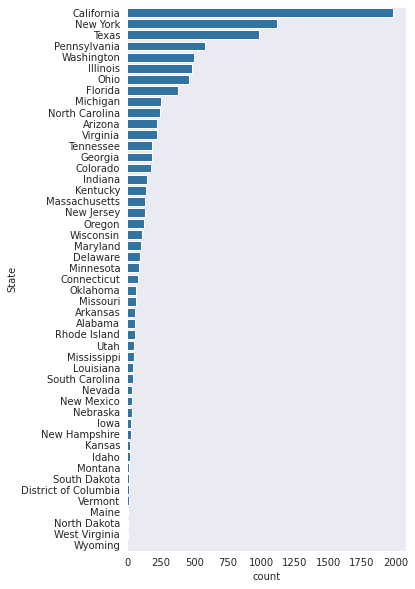

In [45]:
#set figure size
plt.figure(figsize = (5,10))

#set order
state_order = samp_superstore.State.value_counts().index

#visualize State distribution
sb.countplot(data = samp_superstore, y = "State", color = base_color,
            order = state_order); 

plt.grid(False)


#### What is the regional distribution of the sales made?

In [46]:
#choose color 
color4 = sb.color_palette()[5]

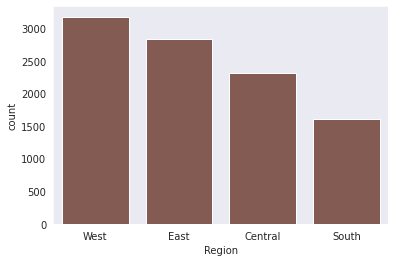

In [47]:
#obtain order 
reg_order = samp_superstore.Region.value_counts().index

#visualize
sb.countplot(data = samp_superstore, x = "Region", color = color4, 
             order = reg_order);

plt.grid(False)


#### What is the categorical distribution of the products sold?

In [48]:
#set order of bars 
cat_order = samp_superstore.Category.value_counts().index

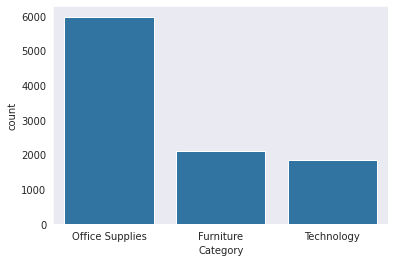

In [49]:
#visualize Category of products sold
sb.countplot(data = samp_superstore, x = "Category", color = base_color, 
            order = cat_order);

plt.grid(False)
             

#### What is the distribution of the `Office Supplies` products sold?

In [50]:
#filter out rows for which the products are in the office supplies category
office_supplies = samp_superstore[samp_superstore["Category"] == "Office Supplies"]

#set order for office supplies subcategories 
office_sup_order = office_supplies.Sub_Category.value_counts().index

#choose bar color 
color5 = sb.color_palette()[6]


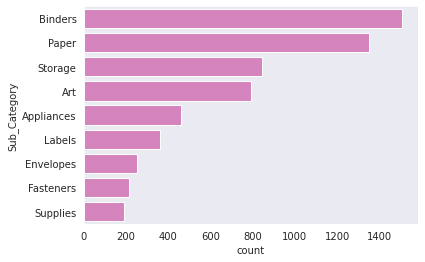

In [51]:
#visualize 
sb.countplot(data = office_supplies, y = "Sub_Category", color = color5,
             order = office_sup_order); 

plt.grid(False)


#### What is the `Sales` values distribution?

In [52]:
#obtain the summary statistics of the Sales features
samp_superstore.Sales.describe() 


count     9921.000000
mean       226.864776
std        613.003068
min          0.444000
25%         17.150000
50%         53.952000
75%        208.160000
max      22638.480000
Name: Sales, dtype: float64

In [53]:
#set bin edges 
bin_edges = np.arange(0, samp_superstore.Sales.max() + 500, 500)


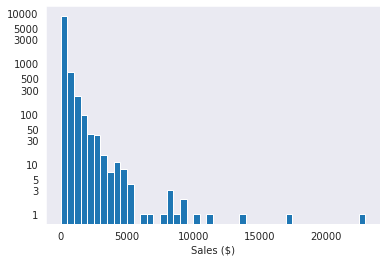

In [54]:
#visualize the Sales column
plt.hist(data = samp_superstore, x = "Sales", bins = bin_edges); 

#transform the y-axis to a log scale
plt.yscale("log")

#create ticks for y-axis
y_ticks = [1, 3, 5, 10, 30, 50, 100, 300, 500, 1000, 3000, 5000,
           10000] 
y_labels = ["{}".format(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels);

#label the x-axis
plt.xlabel("Sales ($)") 

plt.grid(False)


The `Sales` values are skewed to the right, with some outliers after values in the range of \\$0-5000. Next, the `Sales` values will be visualized without the outliers. 

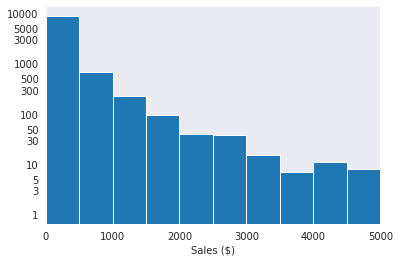

In [55]:
#visualize the Sales column
plt.hist(data = samp_superstore, x = "Sales", bins = bin_edges); 

#transform the y-axis to a log scale
plt.yscale("log")

#create ticks for the y-axis
y_ticks = [1, 3, 5, 10, 30, 50, 100, 300, 500, 1000, 3000, 5000,
           10000] 
y_labels = ["{}".format(y_tick) for y_tick in y_ticks] 
plt.yticks(y_ticks, y_labels)

#limit the x-axis 
plt.xlim(0, 5000);

#label the x-axis 
plt.xlabel("Sales ($)") 

plt.grid(False)


#### What is the distribution of the quantity of products sold? 

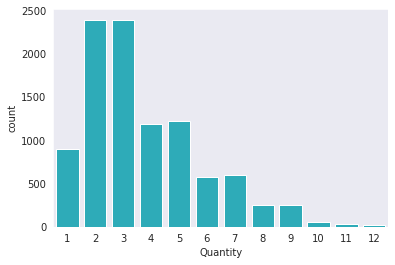

In [56]:
#visual Quantity of products sold
sb.countplot(data = samp_superstore, x = "Quantity", color = choice_color);

plt.grid(False)

#### What is the highest discount given? 

In [57]:
#obtain descriptive statistics of Discount column 
samp_superstore.Discount.describe()


count    9921.000000
mean        0.156289
std         0.206497
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

In [58]:
#create bin edges 
bin_edges = np.arange(0, 0.8 + 0.2, 0.1)


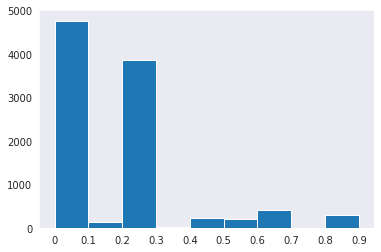

In [59]:
#visualize Discount 
plt.hist(data = samp_superstore, x = "Discount", bins = bin_edges); 

#create ticks 
ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
labels = ["{}".format(tick) for tick in ticks]

plt.xticks(ticks, labels);
plt.grid(False)
